# TODO
- Apply N-fold cross validation on all tests

# Mounting drive
For this to work, we made a dataset folder and placed the CSVs into that folder.

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Imports

In [ ]:
import time

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

from sklearn.neighbors import KNeighborsClassifier # K Nearest Neighbor
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.ensemble import AdaBoostClassifier # AdaBoost
from sklearn.ensemble import GradientBoostingClassifier # Gradient Boosting
from sklearn.naive_bayes import GaussianNB # Gaussian Naive Bayes
from sklearn.naive_bayes import MultinomialNB # Multinomial Naive Bayes
from sklearn.svm import LinearSVC # Linear Support Vector Classification

# Importing data from drive

In [ ]:
# Import data
path = "/content/drive/MyDrive/dataset/all_data.csv" # Change to the combined dataset later.
raw_dataset = pd.read_csv(path)

raw_dataset

,bytes_in,bytes_out,destination.bytes,source.bytes,network.bytes,event.duration,source.ip,destination.ip,source.port,destination.port,attack
0,76.0,56.0,56.0,76.0,132.0,7950.0,10.10.10.10,10.10.10.30,58456.0,18.0,1.0
1,76.0,56.0,56.0,76.0,132.0,6970.0,10.10.10.10,10.10.10.30,42998.0,19.0,1.0
2,76.0,56.0,56.0,76.0,132.0,9280.0,10.10.10.10,10.10.10.30,56374.0,20.0,1.0
3,76.0,56.0,56.0,76.0,132.0,8220.0,10.10.10.10,10.10.10.30,33268.0,21.0,1.0
4,76.0,56.0,56.0,76.0,132.0,8050.0,10.10.10.10,10.10.10.30,51472.0,22.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
56636,1200.0,278.0,278.0,1200.0,1500.0,14847.8,192.168.0.3,192.168.0.2,60110.0,5044.0,0.0
56637,9600.0,4400.0,4400.0,9600.0,14000.0,10236.0,192.168.0.3,192.168.0.2,58224.0,9200.0,0.0
56638,1200.0,278.0,278.0,1200.0,1500.0,14847.8,192.168.0.3,192.168.0.2,60110.0,5044.0,0.0
56639,5600.0,3900.0,3900.0,5600.0,9500.0,0.2,192.168.0.3,192.168.0.2,58224.0,9200.0,0.0


# Getting 30% attack, 70% benign (preferred)

In [ ]:
# 30% attack data, 70% benign
num_attack = round(raw_dataset.loc[raw_dataset['attack'] != 1.0].shape[0] * 0.3)
print(num_attack)

attack = raw_dataset.loc[raw_dataset['attack'] == 1.0].sample(n=num_attack, random_state=69)
non_attack = raw_dataset.loc[raw_dataset['attack'] == 0.0]

5504


In [ ]:
dataset = pd.concat([attack, non_attack])
dataset

,bytes_in,bytes_out,destination.bytes,source.bytes,network.bytes,event.duration,source.ip,destination.ip,source.port,destination.port,attack
30887,76.0,56.0,56.0,76.0,132.0,7570.0,10.10.10.10,10.10.10.30,48438.0,40851.0,1.0
1262,76.0,56.0,56.0,76.0,132.0,6310.0,10.10.10.10,10.10.10.30,35478.0,1335.0,1.0
29264,76.0,56.0,56.0,76.0,132.0,6270.0,10.10.10.10,10.10.10.20,52638.0,25086.0,1.0
7464,76.0,56.0,56.0,76.0,132.0,6450.0,10.10.10.10,10.10.10.30,53790.0,33244.0,1.0
1274,76.0,56.0,56.0,76.0,132.0,6260.0,10.10.10.10,10.10.10.30,38938.0,1347.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
56636,1200.0,278.0,278.0,1200.0,1500.0,14847.8,192.168.0.3,192.168.0.2,60110.0,5044.0,0.0
56637,9600.0,4400.0,4400.0,9600.0,14000.0,10236.0,192.168.0.3,192.168.0.2,58224.0,9200.0,0.0
56638,1200.0,278.0,278.0,1200.0,1500.0,14847.8,192.168.0.3,192.168.0.2,60110.0,5044.0,0.0
56639,5600.0,3900.0,3900.0,5600.0,9500.0,0.2,192.168.0.3,192.168.0.2,58224.0,9200.0,0.0


# Helper function

In [ ]:
def get_confusion_matrix_result(y_test, results):
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, results).ravel()

    print("True Negative: ", tn)
    print("False Positive: ", fp)
    print("False Negative: ", fn)
    print("True Positive: ", tp)

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    accuracy = metrics.accuracy_score(y_test, results)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("Accuracy: ", accuracy)
    print()

    return [accuracy, recall, precision]

# Scale data with StandardScaler

In [ ]:
# X-axis contains everything except the 'attack', 'source.ip', 'destination.ip' columns. 
# IP columns are dropped because they are strings, and cannot be scaled

X = dataset.drop(['attack', 'source.ip', 'destination.ip'], axis=1) 
X = np.asarray(X)

X_scaled = (StandardScaler().fit(X).transform(X.astype(float)))
Y = dataset['attack'] # Y-axis contains only the 'attack' column.

# Train Data with X-scaled values.

In [ ]:
# Train the 'attack' column, using x scaled values.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=1)

# Testing k values from 1 to 100.

In [ ]:
# Train the 'attack' column from the cleaned csv.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

accuracy_scores = []
error_rate = []
end = 100
for i in range(1, end+1):
  print("K = ", i)
  # Instantiating the KNN Algorithm
  knn = KNeighborsClassifier(n_neighbors=i, metric = 'minkowski', p = 2)

  # Training the KNN algorithm
  knn.fit(X_train,y_train)

  # Predicting with the Test Data and the KNN Algorithm
  y_predicted_results = knn.predict(X_test)

  accuracy = metrics.accuracy_score(y_test,y_predicted_results)
  get_confusion_matrix_result(y_test, y_predicted_results)
  accuracy_scores.append(accuracy)
  error_rate.append(np.mean(y_predicted_results != y_test))

K =  1
True Negative:  5464
False Positive:  9
False Negative:  21
True Positive:  1662
Precision:  0.9946140035906643
Recall:  0.9875222816399287
Accuracy:  0.9958077138065958

K =  2
True Negative:  5468
False Positive:  5
False Negative:  33
True Positive:  1650
Precision:  0.9969788519637462
Recall:  0.9803921568627451
Accuracy:  0.9946897708216881

K =  3
True Negative:  5462
False Positive:  11
False Negative:  27
True Positive:  1656
Precision:  0.9934013197360528
Recall:  0.983957219251337
Accuracy:  0.9946897708216881

K =  4
True Negative:  5467
False Positive:  6
False Negative:  36
True Positive:  1647
Precision:  0.9963702359346642
Recall:  0.9786096256684492
Accuracy:  0.9941307993292342

K =  5
True Negative:  5464
False Positive:  9
False Negative:  32
True Positive:  1651
Precision:  0.994578313253012
Recall:  0.9809863339275104
Accuracy:  0.9942705422023477

K =  6
True Negative:  5464
False Positive:  9
False Negative:  38
True Positive:  1645
Precision:  0.994558645

Minimum error:  0.004192286193404136 at K = 1
Maximum accuracy:  0.9958077138065958 at K = 1


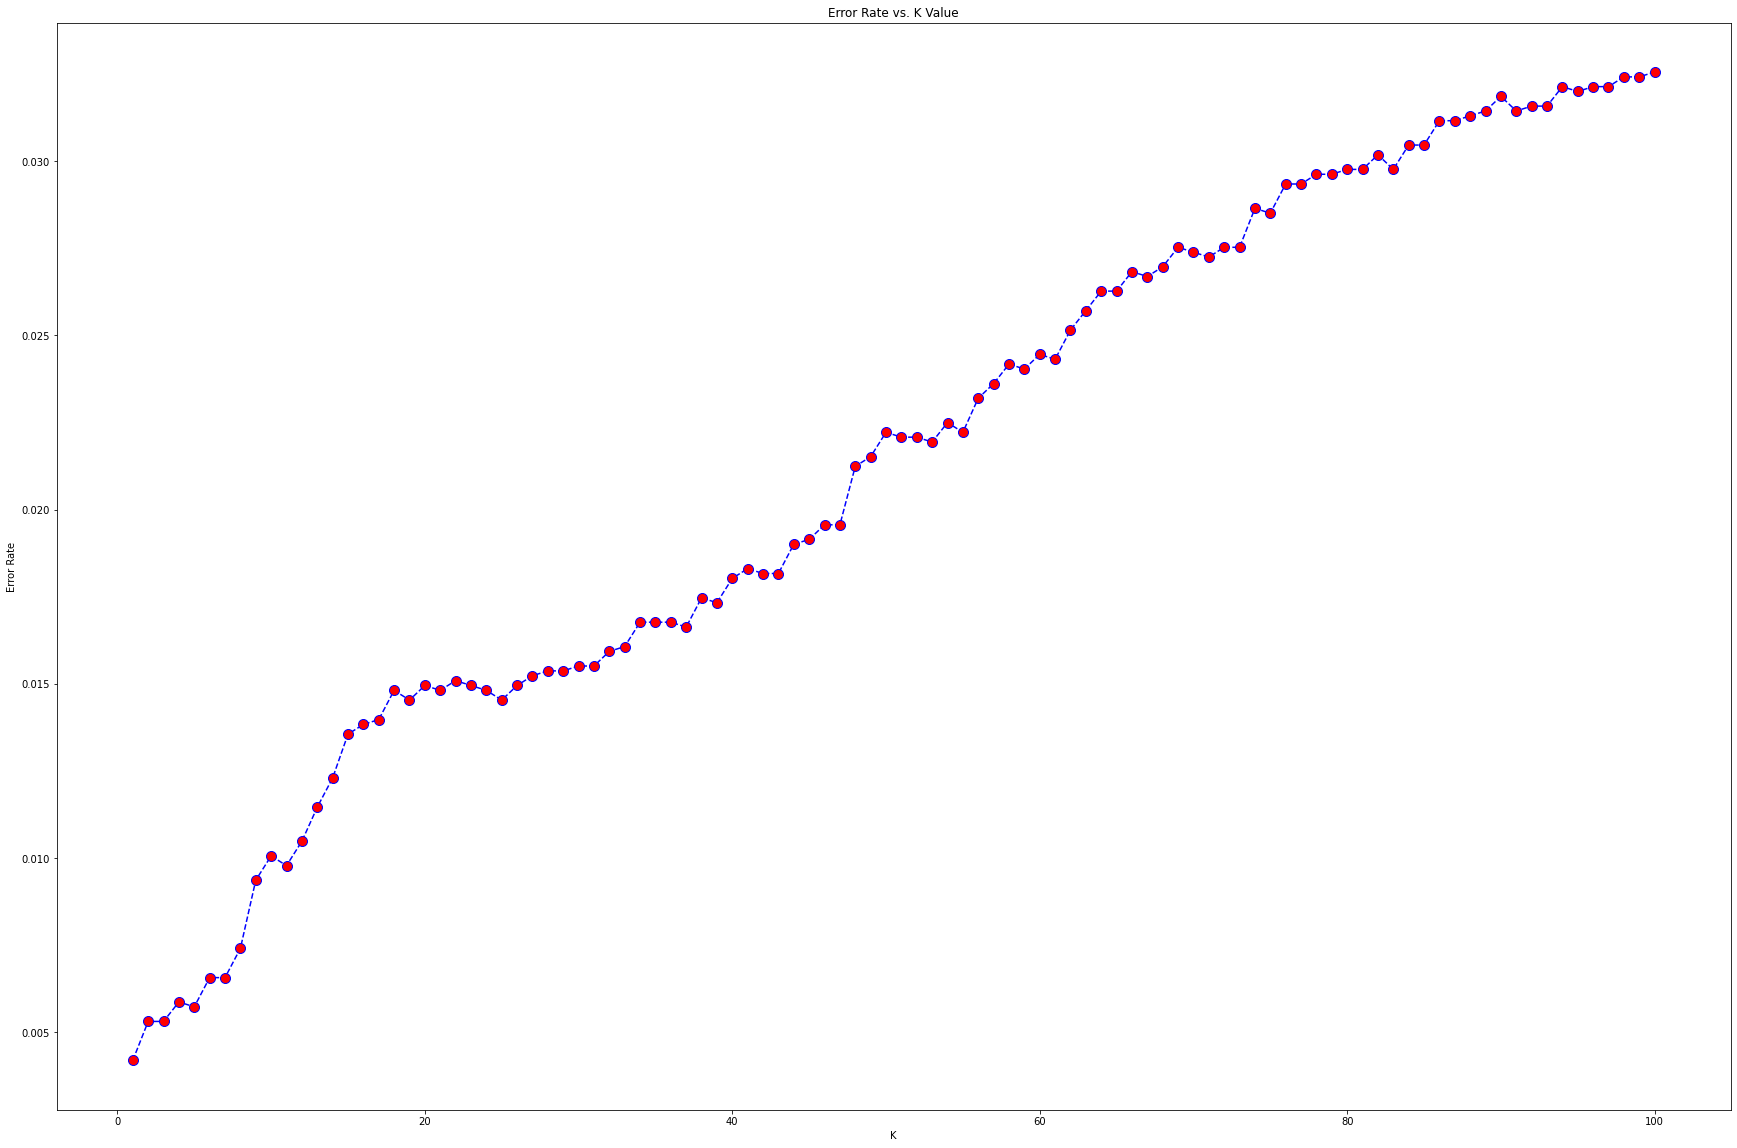

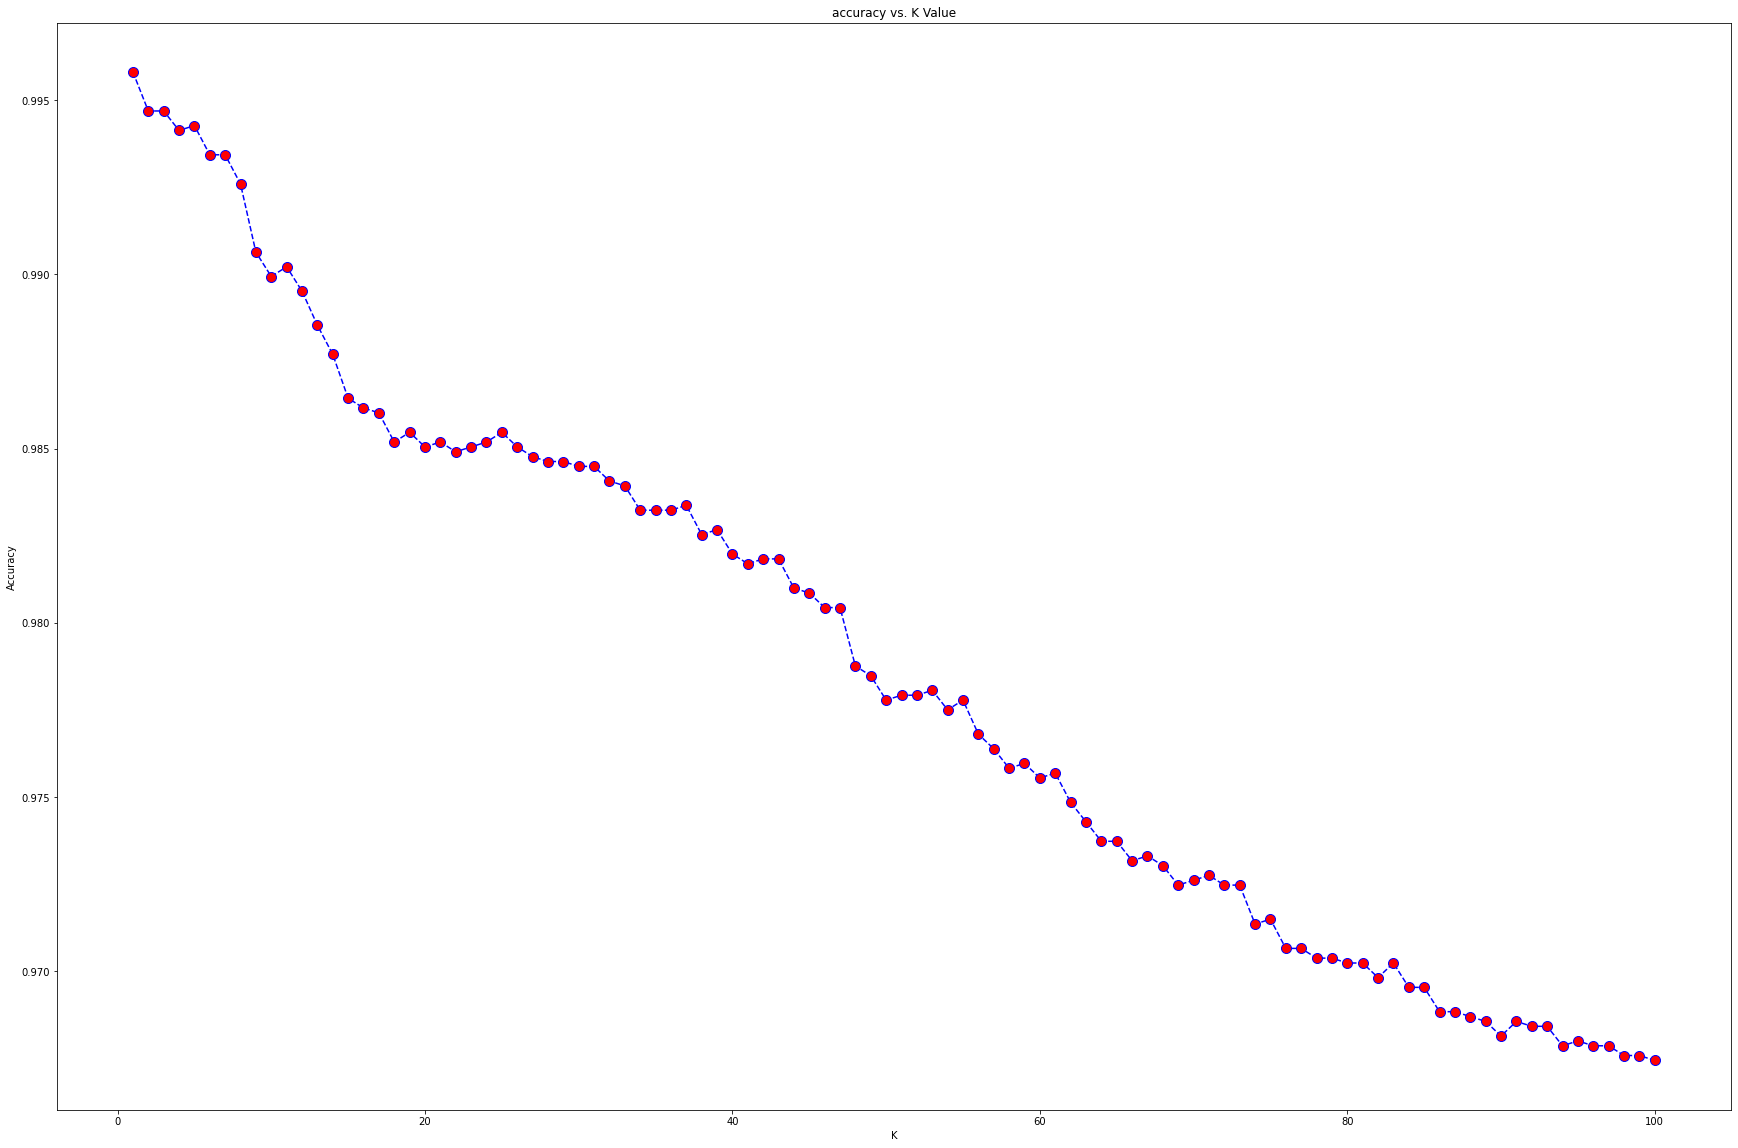

In [ ]:
plt.figure(figsize=(30,20))
plt.plot(range(1,end+1),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

best_min_error_k = error_rate.index(min(error_rate)) + 1
print("Minimum error: ",min(error_rate),"at K =", best_min_error_k)

plt.figure(figsize=(30,20))
plt.plot(range(1,end+1),accuracy_scores,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

best_max_acc_k = accuracy_scores.index(max(accuracy_scores)) + 1
print("Maximum accuracy: ",max(accuracy_scores),"at K =",best_max_acc_k)

# KNN with best k value

True Negative:  5464
False Positive:  9
False Negative:  21
True Positive:  1662
Precision:  0.9946140035906643
Recall:  0.9875222816399287
Accuracy:  0.9958077138065958

Time taken: 0.26415562629699707
              precision    recall  f1-score   support

  Non-Attack       1.00      1.00      1.00      5473
      Attack       0.99      0.99      0.99      1683

    accuracy                           1.00      7156
   macro avg       1.00      0.99      0.99      7156
weighted avg       1.00      1.00      1.00      7156

5-fold mean: 0.9920346165708238
5-fold std: 0.0024449672480916897


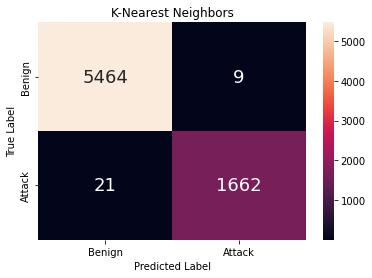

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

knn = KNeighborsClassifier(n_neighbors=best_max_acc_k, metric = 'minkowski', p = 2)

# Training the KNN algorithm
start = time.time()
knn.fit(X_train,y_train)

# Predicting with the Test Data and the KNN Algorithm
y_predicted_results = knn.predict(X_test)
time_taken = time.time() - start

knn_data = get_confusion_matrix_result(y_test, y_predicted_results)
knn_data.append(time_taken)

print(f"Time taken: {time_taken}")
print(classification_report(y_test, y_predicted_results, target_names=["Non-Attack", "Attack"]))

# 5-fold cross validation
scores = cross_val_score(knn, X_test, y_test, cv=5)
print(f'5-fold mean: {scores.mean()}')
print(f'5-fold std: {scores.std()}')

cf_labels = ["Benign", "Attack"]

ax = plt.axes()
sb.heatmap(confusion_matrix(y_test, y_predicted_results), 
           annot = True, fmt=".0f", annot_kws={"size": 18},
           xticklabels=cf_labels, yticklabels=cf_labels)

ax.set_title('K-Nearest Neighbors')
ax.set_ylabel("True Label")
ax.set_xlabel("Predicted Label")
plt.show()

# Train Data with normal values

Train data again, this time with normal values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

# Decision Tree

True Negative:  5473
False Positive:  0
False Negative:  3
True Positive:  1680
Precision:  1.0
Recall:  0.9982174688057041
Accuracy:  0.9995807713806596

Time taken: 0.028852224349975586
              precision    recall  f1-score   support

  Non-Attack       1.00      1.00      1.00      5473
      Attack       1.00      1.00      1.00      1683

    accuracy                           1.00      7156
   macro avg       1.00      1.00      1.00      7156
weighted avg       1.00      1.00      1.00      7156

5-fold mean: 0.9980437167429894
5-fold std: 0.000684215290390839


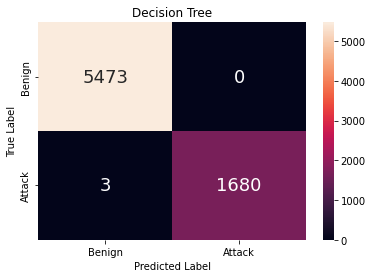

In [ ]:
# Instantiating the Decision Tree Algorithm
decision = DecisionTreeClassifier()

# Training the Decision Tree algorithm
start = time.time()
decision.fit(X_train,y_train)

# Predicting with the Test Data and the Decision Tree Algorithm
y_predicted_results = decision.predict(X_test)
time_taken = time.time() - start

dt_data = get_confusion_matrix_result(y_test, y_predicted_results)
dt_data.append(time_taken)

print(f"Time taken: {time_taken}")
print(classification_report(y_test, y_predicted_results, target_names=["Non-Attack", "Attack"]))

# 5-fold cross validation
scores = cross_val_score(decision, X_test, y_test, cv=5)
print(f'5-fold mean: {scores.mean()}')
print(f'5-fold std: {scores.std()}')

cf_labels = ["Benign", "Attack"]

ax = plt.axes()
sb.heatmap(confusion_matrix(y_test, y_predicted_results), 
           annot = True, fmt=".0f", annot_kws={"size": 18},
           xticklabels=cf_labels, yticklabels=cf_labels)

ax.set_title('Decision Tree')
ax.set_ylabel("True Label")
ax.set_xlabel("Predicted Label")
plt.show()

# Random Forest

True Negative:  5473
False Positive:  0
False Negative:  1
True Positive:  1682
Precision:  1.0
Recall:  0.9994058229352347
Accuracy:  0.9998602571268865

Time taken: 0.8384816646575928
              precision    recall  f1-score   support

  Non-Attack       1.00      1.00      1.00      5473
      Attack       1.00      1.00      1.00      1683

    accuracy                           1.00      7156
   macro avg       1.00      1.00      1.00      7156
weighted avg       1.00      1.00      1.00      7156

5-fold mean: 0.9986024735603106
5-fold std: 0.0007655993285400326


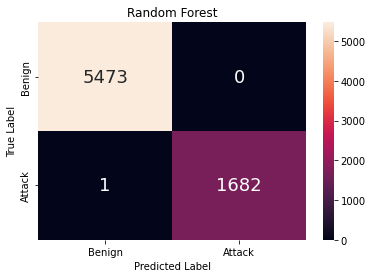

In [ ]:
# Instantiating the Random Forest Algorithm
random_forest = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)

# Training the Random Forest algorithm
start = time.time()
random_forest.fit(X_train,y_train)

# Predicting with the Test Data and the Random Forest Algorithm
y_predicted_results = random_forest.predict(X_test)
time_taken = time.time() - start

rf_data = get_confusion_matrix_result(y_test, y_predicted_results)
rf_data.append(time_taken)

print(f"Time taken: {time_taken}")
print(classification_report(y_test, y_predicted_results, target_names=["Non-Attack", "Attack"]))

# 5-fold cross validation
scores = cross_val_score(random_forest, X_test, y_test, cv=5)
print(f'5-fold mean: {scores.mean()}')
print(f'5-fold std: {scores.std()}')

cf_labels = ["Benign", "Attack"]

ax = plt.axes()
sb.heatmap(confusion_matrix(y_test, y_predicted_results), 
           annot = True, fmt=".0f", annot_kws={"size": 18},
           xticklabels=cf_labels, yticklabels=cf_labels)

ax.set_title('Random Forest')
ax.set_ylabel("True Label")
ax.set_xlabel("Predicted Label")
plt.show()

# Adaboost

True Negative:  5471
False Positive:  2
False Negative:  3
True Positive:  1680
Precision:  0.9988109393579072
Recall:  0.9982174688057041
Accuracy:  0.9993012856344327

Time taken: 0.7790675163269043
              precision    recall  f1-score   support

  Non-Attack       1.00      1.00      1.00      5473
      Attack       1.00      1.00      1.00      1683

    accuracy                           1.00      7156
   macro avg       1.00      1.00      1.00      7156
weighted avg       1.00      1.00      1.00      7156

5-fold mean: 0.9987422359642238
5-fold std: 0.0006847728624217705


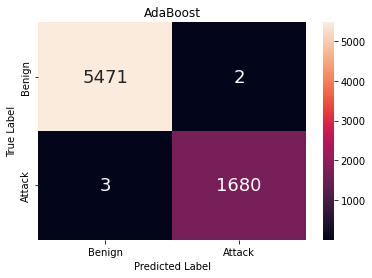

In [ ]:
# Instantiating the AdaBoost Algorithm
adaboost = AdaBoostClassifier()

# Training the AdaBoost algorithm
start = time.time()
adaboost.fit(X_train,y_train)

# Predicting with the Test Data and the AdaBoost Algorithm
y_predicted_results = adaboost.predict(X_test)
time_taken = time.time() - start

ab_data = get_confusion_matrix_result(y_test, y_predicted_results)
ab_data.append(time_taken)

print(f"Time taken: {time_taken}")
print(classification_report(y_test, y_predicted_results, target_names=["Non-Attack", "Attack"]))

# 5-fold cross validation
scores = cross_val_score(adaboost, X_test, y_test, cv=5)
print(f'5-fold mean: {scores.mean()}')
print(f'5-fold std: {scores.std()}')

cf_labels = ["Benign", "Attack"]

ax = plt.axes()
sb.heatmap(confusion_matrix(y_test, y_predicted_results), 
           annot = True, fmt=".0f", annot_kws={"size": 18},
           xticklabels=cf_labels, yticklabels=cf_labels)

ax.set_title('AdaBoost')
ax.set_ylabel("True Label")
ax.set_xlabel("Predicted Label")
plt.show()

# Gradiant Boosting

True Negative:  5472
False Positive:  1
False Negative:  2
True Positive:  1681
Precision:  0.9994054696789536
Recall:  0.9988116458704694
Accuracy:  0.9995807713806596

Time taken: 2.364684820175171
              precision    recall  f1-score   support

  Non-Attack       1.00      1.00      1.00      5473
      Attack       1.00      1.00      1.00      1683

    accuracy                           1.00      7156
   macro avg       1.00      1.00      1.00      7156
weighted avg       1.00      1.00      1.00      7156

5-fold mean: 0.9991615231759641
5-fold std: 0.0005229691513228794


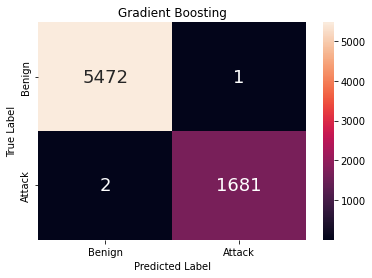

In [ ]:
# Instantiating the GradiantBoosting Algorithm
gb_model = GradientBoostingClassifier()

# Training the GradiantBoosting algorithm
start = time.time()
gb_model.fit(X_train,y_train)

# Predicting with the Test Data and the Gradient Boosting Algorithm
y_predicted_results = gb_model.predict(X_test)
time_taken = time.time() - start

gb_data = get_confusion_matrix_result(y_test, y_predicted_results)
gb_data.append(time_taken)

print(f"Time taken: {time_taken}")
print(classification_report(y_test, y_predicted_results, target_names=["Non-Attack", "Attack"]))

# 5-fold cross validation
scores = cross_val_score(gb_model, X_test, y_test, cv=5)
print(f'5-fold mean: {scores.mean()}')
print(f'5-fold std: {scores.std()}')

cf_labels = ["Benign", "Attack"]

ax = plt.axes()
sb.heatmap(confusion_matrix(y_test, y_predicted_results), 
           annot = True, fmt=".0f", annot_kws={"size": 18},
           xticklabels=cf_labels, yticklabels=cf_labels)

ax.set_title('Gradient Boosting')
ax.set_ylabel("True Label")
ax.set_xlabel("Predicted Label")
plt.show()

# Gaussian Naive Bayes

True Negative:  817
False Positive:  4656
False Negative:  0
True Positive:  1683
Precision:  0.26549929010885
Recall:  1.0
Accuracy:  0.34935718278367806

Time taken: 0.009812355041503906
              precision    recall  f1-score   support

  Non-Attack       1.00      0.15      0.26      5473
      Attack       0.27      1.00      0.42      1683

    accuracy                           0.35      7156
   macro avg       0.63      0.57      0.34      7156
weighted avg       0.83      0.35      0.30      7156

5-fold mean: 0.3585799671285072
5-fold std: 0.00573610170689581


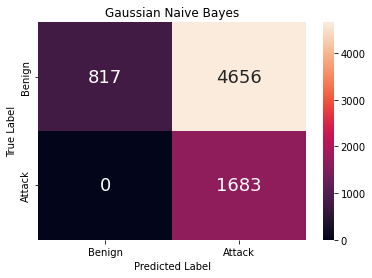

In [ ]:
# Instantiating the GradiantBoosting Algorithm
gausNB = GaussianNB()

# Training the Gaussian Naive Bayes algorithm
start = time.time()
gausNB.fit(X_train,y_train)

# Predicting with the Test Data and the Gaussian Naive Bayes Algorithm
y_predicted_results = gausNB.predict(X_test)
time_taken = time.time() - start

gausNB_data = get_confusion_matrix_result(y_test, y_predicted_results)
gausNB_data.append(time_taken)

print(f"Time taken: {time_taken}")
print(classification_report(y_test, y_predicted_results, target_names=["Non-Attack", "Attack"]))

# 5-fold cross validation
scores = cross_val_score(gausNB, X_test, y_test, cv=5)
print(f'5-fold mean: {scores.mean()}')
print(f'5-fold std: {scores.std()}')

cf_labels = ["Benign", "Attack"]

ax = plt.axes()
sb.heatmap(confusion_matrix(y_test, y_predicted_results), 
           annot = True, fmt=".0f", annot_kws={"size": 18},
           xticklabels=cf_labels, yticklabels=cf_labels)

ax.set_title('Gaussian Naive Bayes')
ax.set_ylabel("True Label")
ax.set_xlabel("Predicted Label")
plt.show()

True Negative:  1315
False Positive:  4158
False Negative:  4
True Positive:  1679
Precision:  0.2876477642624636
Recall:  0.9976232917409388
Accuracy:  0.4183901621017328

Time taken: 0.007898092269897461
              precision    recall  f1-score   support

  Non-Attack       1.00      0.24      0.39      5473
      Attack       0.29      1.00      0.45      1683

    accuracy                           0.42      7156
   macro avg       0.64      0.62      0.42      7156
weighted avg       0.83      0.42      0.40      7156

5-fold mean: 0.3585799671285072
5-fold std: 0.00573610170689581


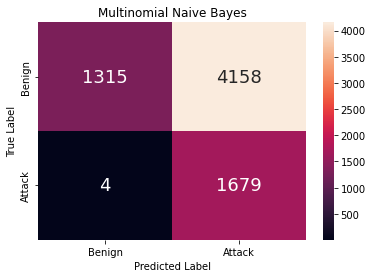

In [ ]:
# Instantiating the Multinomial Naive Bayes Algorithm
multiNB = MultinomialNB()

# Training the Multinomial Naive Bayes algorithm
start = time.time()
multiNB.fit(X_train,y_train)

# Predicting with the Test Data and the Multinomial Naive Bayes Algorithm
y_predicted_results = multiNB.predict(X_test)
time_taken = time.time() - start

multiNB_data = get_confusion_matrix_result(y_test, y_predicted_results)
multiNB_data.append(time_taken)

print(f"Time taken: {time_taken}")
print(classification_report(y_test, y_predicted_results, target_names=["Non-Attack", "Attack"]))

# 5-fold cross validation
scores = cross_val_score(gausNB, X_test, y_test, cv=5)
print(f'5-fold mean: {scores.mean()}')
print(f'5-fold std: {scores.std()}')

cf_labels = ["Benign", "Attack"]

ax = plt.axes()
sb.heatmap(confusion_matrix(y_test, y_predicted_results), 
           annot = True, fmt=".0f", annot_kws={"size": 18},
           xticklabels=cf_labels, yticklabels=cf_labels)

ax.set_title('Multinomial Naive Bayes')
ax.set_ylabel("True Label")
ax.set_xlabel("Predicted Label")
plt.show()

# Linear Support Vector Classification



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


True Negative:  4998
False Positive:  475
False Negative:  4
True Positive:  1679
Precision:  0.7794800371402043
Recall:  0.9976232917409388
Accuracy:  0.9330631637786473

Time taken: 0.684246301651001
              precision    recall  f1-score   support

  Non-Attack       1.00      0.91      0.95      5473
      Attack       0.78      1.00      0.88      1683

    accuracy                           0.93      7156
   macro avg       0.89      0.96      0.91      7156
weighted avg       0.95      0.93      0.94      7156

5-fold mean: 0.3585799671285072
5-fold std: 0.00573610170689581


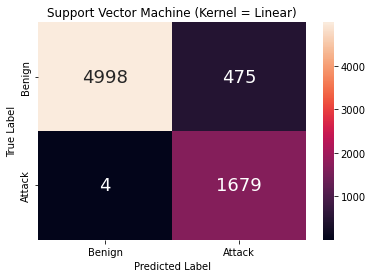

In [ ]:
# Instantiating the Linear Support Vector Classification Algorithm
svm_model = LinearSVC()

# Training the Linear Support Vector Classification algorithm
start = time.time()
svm_model.fit(X_train,y_train)

# Predicting with the Test Data and the Linear Support Vector Classification Algorithm
y_predicted_results = svm_model.predict(X_test)
time_taken = time.time() - start

svm_data = get_confusion_matrix_result(y_test, y_predicted_results)
svm_data.append(time_taken)

print(f"Time taken: {time_taken}")
print(classification_report(y_test, y_predicted_results, target_names=["Non-Attack", "Attack"]))

# 5-fold cross validation
scores = cross_val_score(gausNB, X_test, y_test, cv=5)
print(f'5-fold mean: {scores.mean()}')
print(f'5-fold std: {scores.std()}')

cf_labels = ["Benign", "Attack"]

ax = plt.axes()
sb.heatmap(confusion_matrix(y_test, y_predicted_results), 
           annot = True, fmt=".0f", annot_kws={"size": 18},
           xticklabels=cf_labels, yticklabels=cf_labels)

ax.set_title('Support Vector Machine (Kernel = Linear)')
ax.set_ylabel("True Label")
ax.set_xlabel("Predicted Label")
plt.show()

testing some other svm

# Model Comparison

Best model for Accuracy is Random Forest at 0.9998602571268865
Best model for Recall is Gaussian Naive Bayes at 1.0
Best model for Precision is Decision Tree at 1.0
Best model for Processing Time is Multinomial Naive Bayes at 0.007898092269897461


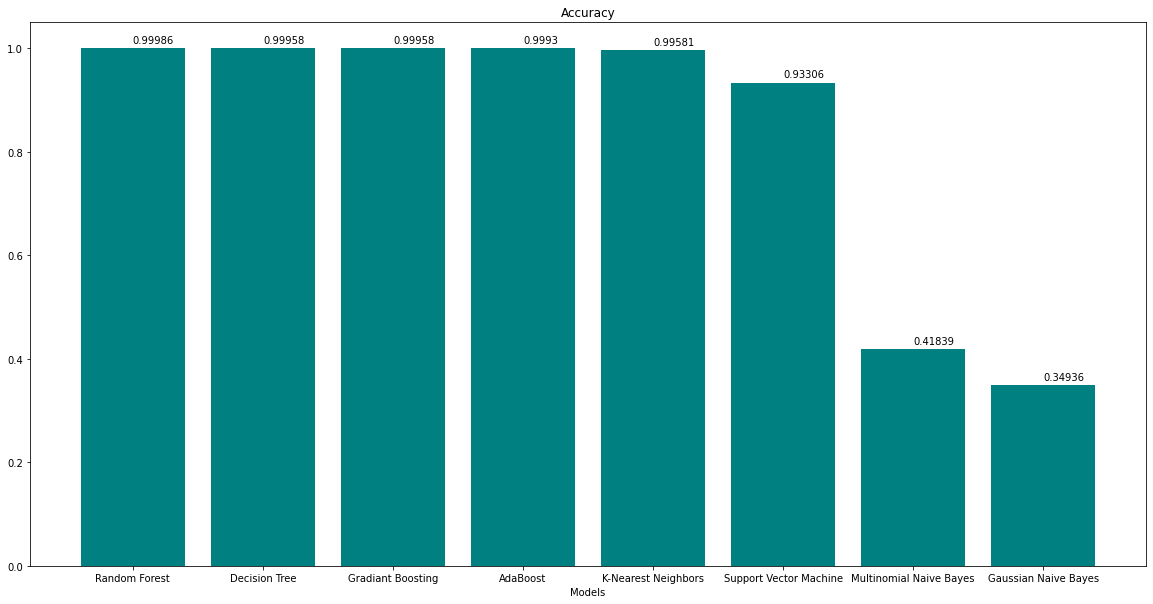

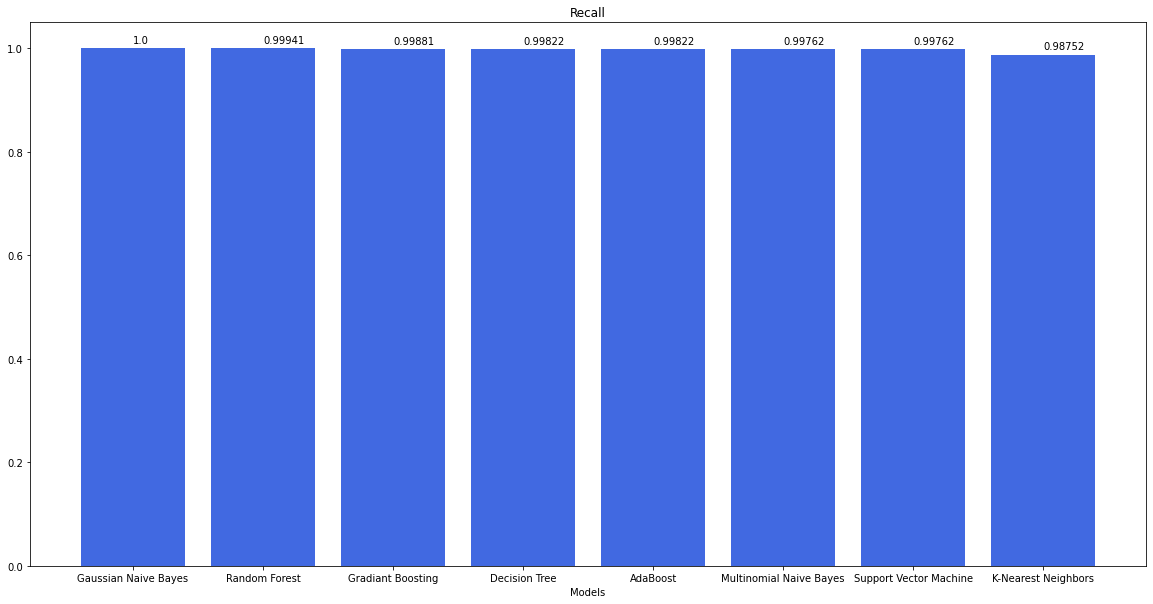

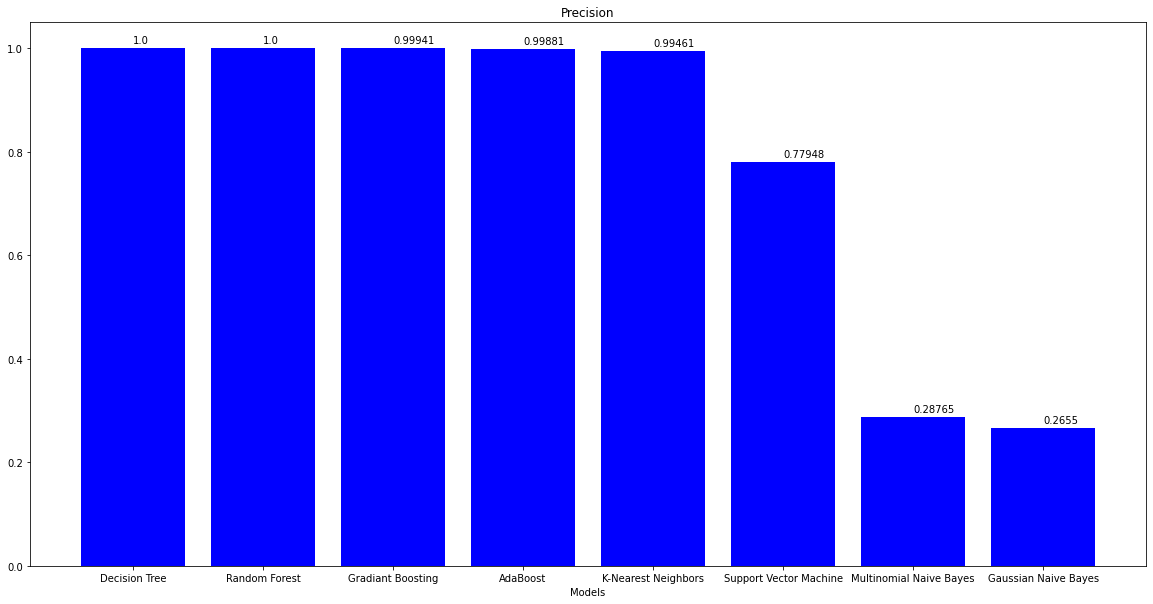

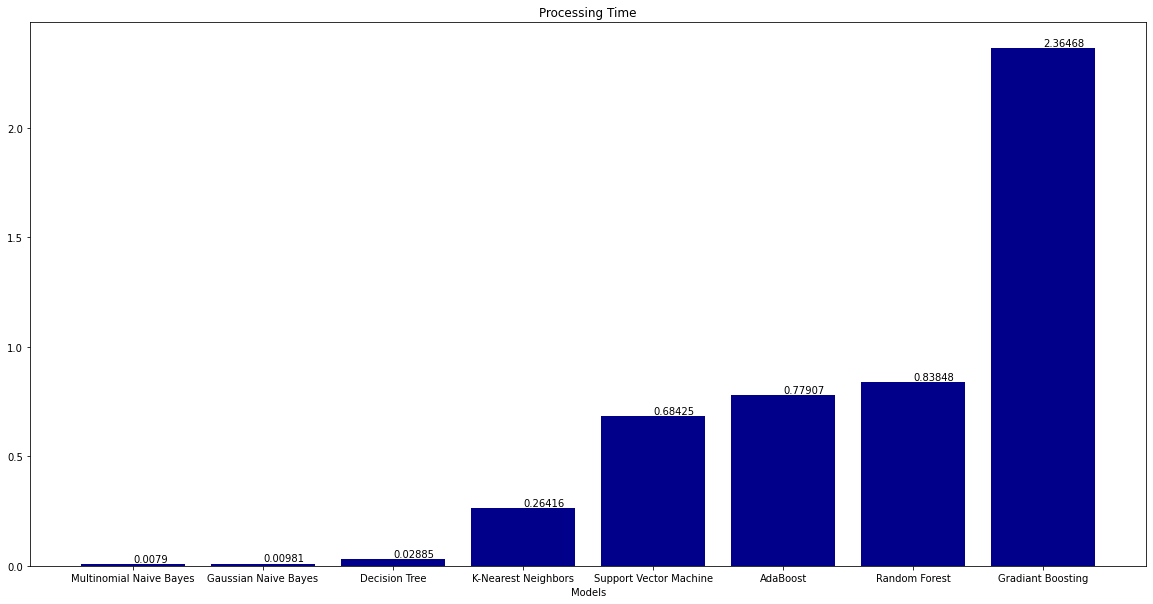

In [ ]:
labels = ['Accuracy', 'Recall', 'Precision', 'Processing Time']
colors = ['teal', 'royalBlue', 'blue', 'darkBlue']

for i in range(len(knn_data)):
  data = {
      'K-Nearest Neighbors': knn_data[i], 
      'Decision Tree': dt_data[i],
      'Random Forest': rf_data[i],
      'AdaBoost': ab_data[i],
      'Gradiant Boosting': gb_data[i],
      'Gaussian Naive Bayes': gausNB_data[i], 
      'Multinomial Naive Bayes': multiNB_data[i],
      'Support Vector Machine': svm_data[i],
  }

  if labels[i] == "Processing Time":
    sorted_data = sorted(data.items(), key=lambda x: x[1], reverse=False)
  else:
    sorted_data = sorted(data.items(), key=lambda x: x[1], reverse=True)
    
  names  = [j[0] for j in sorted_data]
  values = [j[1] for j in sorted_data]

  print(f"Best model for {labels[i]} is {names[0]} at {values[0]}")

  plt.figure(figsize=(20,10))
  plt.bar(names, values, color=colors[i])
  plt.title(labels[i])
  plt.xlabel('Models')

  offset = 0.01

  for k in range(len(names)):
    plt.text(k, values[k] + offset, round(values[k], 5))

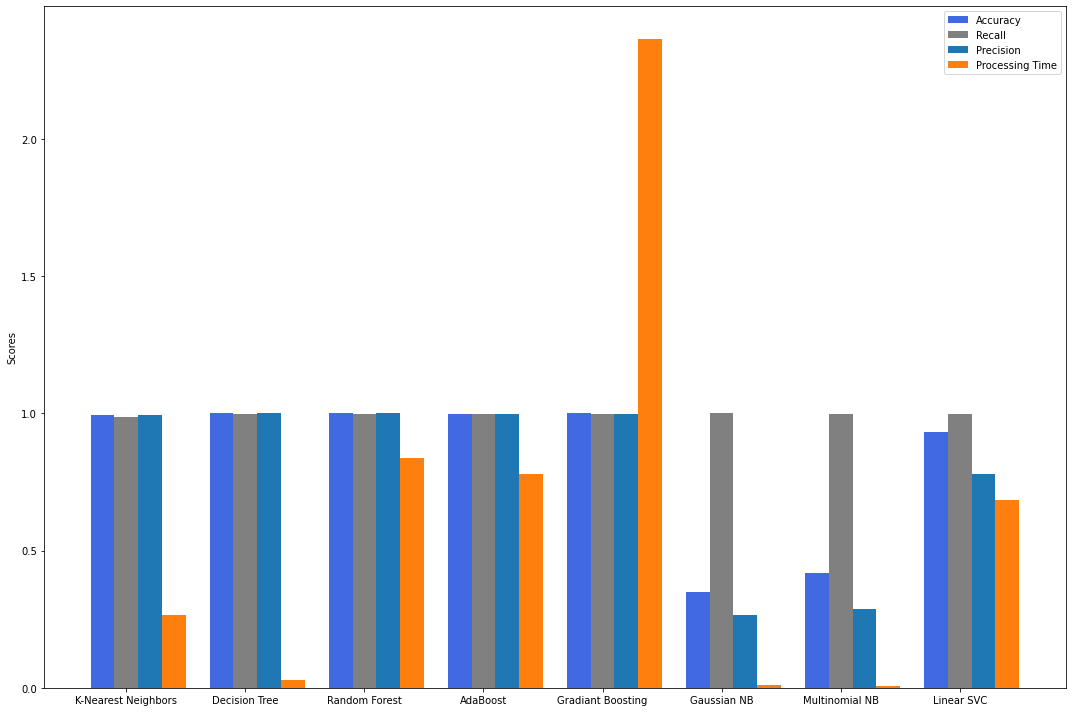

In [ ]:
data = {
    'K-Nearest Neighbors': knn_data, 
    'Decision Tree': dt_data,
    'Random Forest': rf_data,
    'AdaBoost': ab_data,
    'Gradiant Boosting': gb_data,
    'Gaussian NB': gausNB_data, 
    'Multinomial NB': multiNB_data,
    'Linear SVC': svm_data
}

names = list(data.keys())
accuracies = [v[0] for _, v in data.items()]
recalls    = [v[1] for _, v in data.items()]
precisions = [v[2] for _, v in data.items()]
proc_times = [v[3] for _, v in data.items()]

width = 0.4
r1 = np.arange(0,len(names)*2,2) #r1 was reset
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]
r4 = [x + width for x in r3]

fig, ax = plt.subplots(figsize=(15, 10))
rects1 = ax.bar(r1, accuracies, width, color='royalblue', label='Accuracy')
rects2 = ax.bar(r2, recalls, width, color='gray', label='Recall')
rects3 = ax.bar(r3, precisions, width, label='Precision')
rects4 = ax.bar(r4, proc_times, width, label='Processing Time')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_xticks([r + width for r in range(0,len(names)*2,2)])
ax.set_xticklabels(names)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 5)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


# autolabel(rects1)
# autolabel(rects2)
# autolabel(rects3)
# autolabel(rects4)

fig.tight_layout()

plt.show()